# Just trying out stuff

In [51]:
%clear

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [53]:
df = pd.read_csv('animes.csv')

remaining_cols = df.columns[1:]

df.drop([col for col in df.columns if col not in remaining_cols], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              65 non-null     object 
 1   Score             65 non-null     float64
 2   Score Rank        65 non-null     int64  
 3   Popularity Rank   65 non-null     object 
 4   Studio            65 non-null     object 
 5   Num. of episodes  65 non-null     int64  
 6   Genres            65 non-null     object 
 7   Theme(s)          65 non-null     object 
 8   Demographic       65 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 4.7+ KB


In [54]:
df.head(10)

,Name,Score,Score Rank,Popularity Rank,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,9.15,1,#3,Bones,64,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",['Military'],Shounen
1,Gintama°,9.09,2,#337,Bandai Namco Pictures,51,"['Action', 'Comedy', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",Shounen
2,Steins;Gate,9.09,3,#13,White Fox,24,"['Drama', 'Sci-Fi', 'Suspense']",['Psychological'],None
3,Shingeki no Kyojin Season 3 Part 2,9.08,4,#31,Wit Studio,10,"['Action', 'Drama', 'Fantasy', 'Mystery']","['Military', 'Super Power']",Shounen
4,Shingeki no Kyojin: The Final Season Part 2,9.06,5,#184,MAPPA,12,"['Action', 'Drama', 'Fantasy', 'Mystery']","['Military', 'Super Power']",Shounen
5,Gintama',9.06,6,#382,Sunrise,51,"['Action', 'Comedy', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",Shounen
6,Gintama: The Final,9.05,7,#1766,Bandai Namco Pictures,1,"['Action', 'Comedy', 'Drama', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",Shounen
7,Hunter x Hunter (2011),9.05,8,#10,Madhouse,148,"['Action', 'Adventure', 'Fantasy']",['Super Power'],Shounen
8,Fruits Basket: The Final,9.04,9,#562,TMS Entertainment,13,"['Drama', 'Romance', 'Slice of Life', 'Superna...",[],Shoujo
9,Gintama': Enchousen,9.04,10,#692,Sunrise,13,"['Action', 'Comedy', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",Shounen


In [55]:
encode_columns = ['Studio', 'Demographic']
for col in encode_columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head(10)

,Name,Score,Score Rank,Popularity Rank,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,9.15,1,#3,4,64,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",['Military'],4
1,Gintama°,9.09,2,#337,3,51,"['Action', 'Comedy', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",4
2,Steins;Gate,9.09,3,#13,27,24,"['Drama', 'Sci-Fi', 'Suspense']",['Psychological'],1
3,Shingeki no Kyojin Season 3 Part 2,9.08,4,#31,28,10,"['Action', 'Drama', 'Fantasy', 'Mystery']","['Military', 'Super Power']",4
4,Shingeki no Kyojin: The Final Season Part 2,9.06,5,#184,12,12,"['Action', 'Drama', 'Fantasy', 'Mystery']","['Military', 'Super Power']",4
5,Gintama',9.06,6,#382,24,51,"['Action', 'Comedy', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",4
6,Gintama: The Final,9.05,7,#1766,3,1,"['Action', 'Comedy', 'Drama', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",4
7,Hunter x Hunter (2011),9.05,8,#10,13,148,"['Action', 'Adventure', 'Fantasy']",['Super Power'],4
8,Fruits Basket: The Final,9.04,9,#562,25,13,"['Drama', 'Romance', 'Slice of Life', 'Superna...",[],3
9,Gintama': Enchousen,9.04,10,#692,24,13,"['Action', 'Comedy', 'Sci-Fi']","['Historical', 'Parody', 'Samurai']",4


# Viewing the data:

First, we'll view the relationship between each of the features.

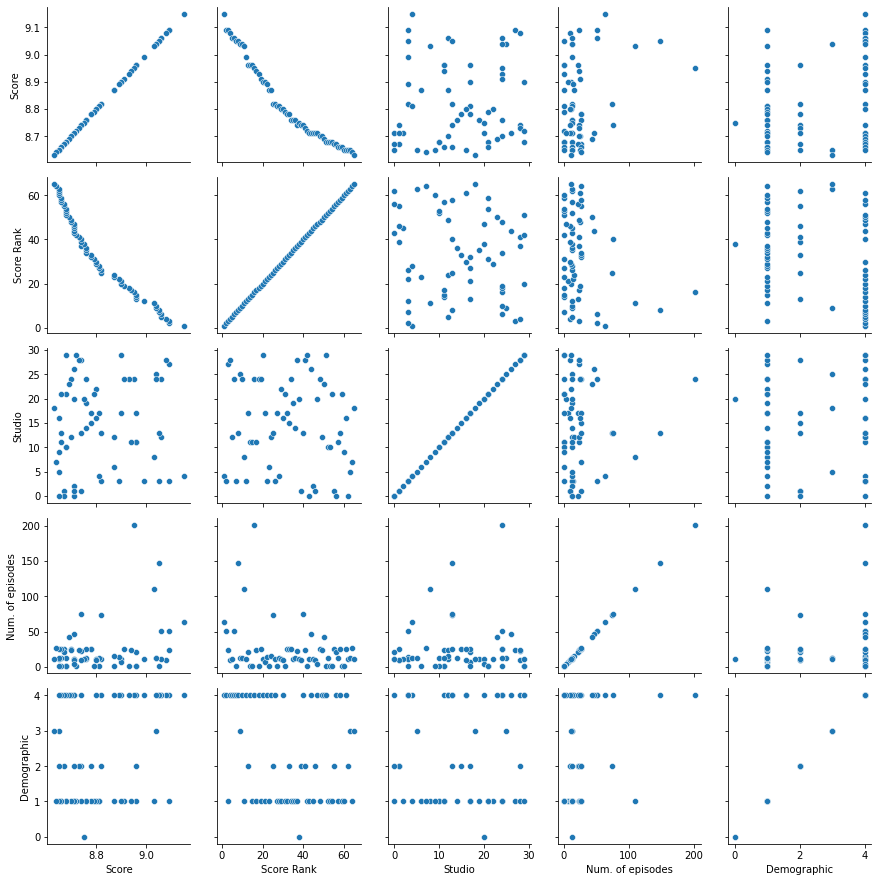

In [56]:
grid = sns.PairGrid(df)
grid.map(sns.scatterplot)

- Some information we can infer from the previous plot:
  1. 

Let's view the mean rating of each studio:

Text(0, 0.5, 'Score by studio')

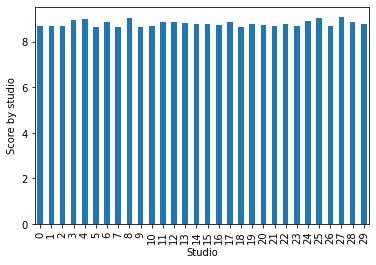

In [57]:
df.groupby(['Studio'])['Score'].mean().plot(kind='bar')
plt.ylabel('Score by studio')

Mean score based on demographics (None, Shounen, Shoujo, Seinen, Jousei):

<AxesSubplot:xlabel='Demographic', ylabel='Score'>

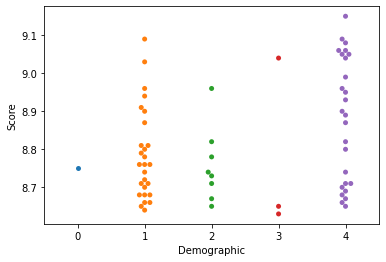

In [58]:
sns.swarmplot(x='Demographic', y='Score', data=df)